In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [3]:
# Importing the dataset
data = pd.read_csv('Admission_Predict.csv')

# Check the top five records of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Converting the target variable into a categorical variable

data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)

In [5]:
# Dropping columns
data = data.drop(['Serial No.', 'Chance of Admit '], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [6]:
# Let's check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit              500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [7]:
# Let's check the summary statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
Admit,500.0,0.28400,0.451388,0.0,0.0000,0.00,1.00,1.00


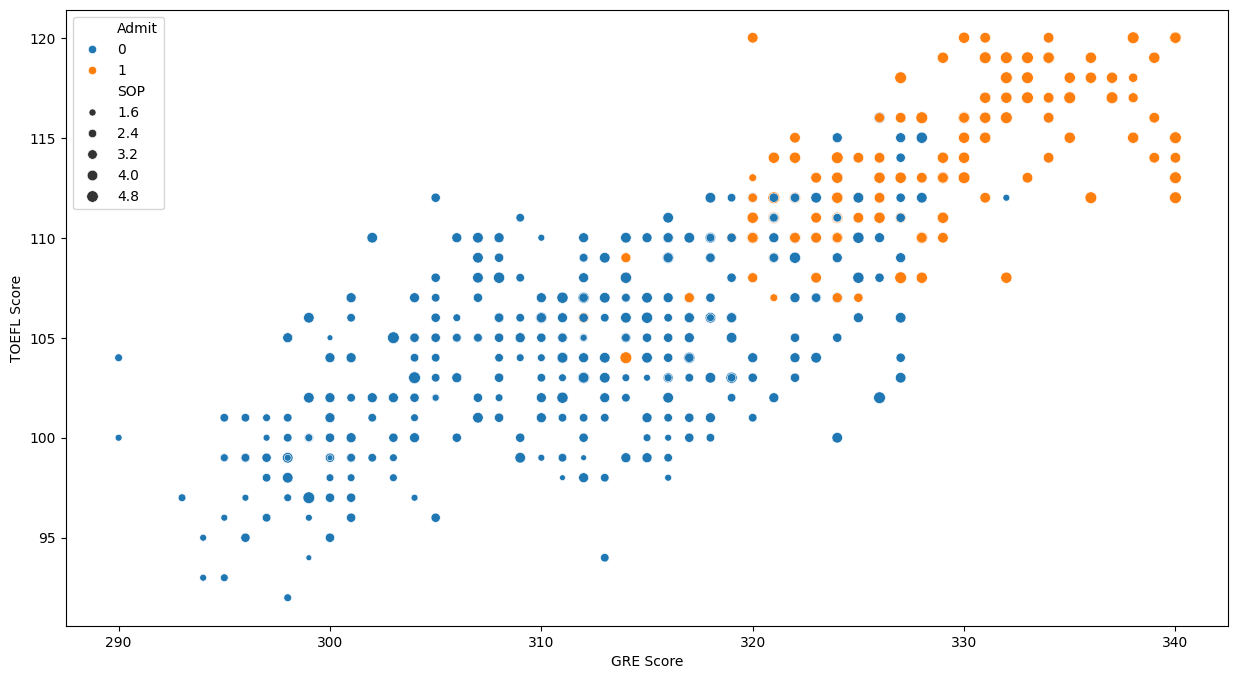

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, 
           x='GRE Score', 
           y='TOEFL Score', 
           hue='Admit',
           size='SOP');

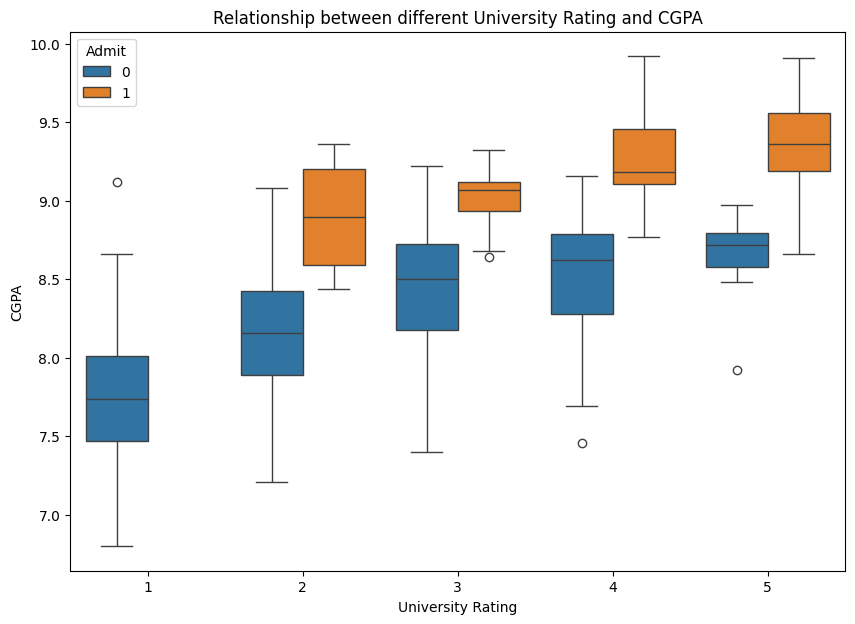

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,
             x='University Rating', 
             y='CGPA',
             hue='Admit')
plt.title('Relationship between different University Rating and CGPA')
plt.show()

In [10]:
# Creating one hot encoding for the column - University Rating and then dropping University Rating
one_hot_data = pd.concat([data, pd.get_dummies(data['University Rating'], prefix = 'University Rating')], axis=1)

one_hot_data = one_hot_data.drop(columns = 'University Rating')

one_hot_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,4.5,4.5,9.65,1,1,False,False,False,True,False
1,324,107,4.0,4.5,8.87,1,0,False,False,False,True,False
2,316,104,3.0,3.5,8.00,1,0,False,False,True,False,False
3,322,110,3.5,2.5,8.67,1,0,False,False,True,False,False
4,314,103,2.0,3.0,8.21,0,0,False,True,False,False,False


In [10]:
features = one_hot_data.drop(['Admit'], axis=1)

target = one_hot_data['Admit']

In [11]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [13]:
X_test_normalized = scaler.transform(X_test)

In [14]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [15]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
12/12 - 0s - 41ms/step - accuracy: 0.6833 - loss: 0.6527 - val_accuracy: 0.5750 - val_loss: 0.6368
Epoch 2/150
12/12 - 0s - 3ms/step - accuracy: 0.7333 - loss: 0.5799 - val_accuracy: 0.5750 - val_loss: 0.5998
Epoch 3/150
12/12 - 0s - 3ms/step - accuracy: 0.7361 - loss: 0.5354 - val_accuracy: 0.7250 - val_loss: 0.5482
Epoch 4/150
12/12 - 0s - 3ms/step - accuracy: 0.8056 - loss: 0.4856 - val_accuracy: 0.8250 - val_loss: 0.4927
Epoch 5/150
12/12 - 0s - 3ms/step - accuracy: 0.8611 - loss: 0.4462 - val_accuracy: 0.9000 - val_loss: 0.4428
Epoch 6/150
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.4156 - val_accuracy: 0.9250 - val_loss: 0.3984
Epoch 7/150
12/12 - 0s - 3ms/step - accuracy: 0.8556 - loss: 0.3842 - val_accuracy: 0.9250 - val_loss: 0.3635
Epoch 8/150
12/12 - 0s - 3ms/step - accuracy: 0.8806 - loss: 0.3520 - val_accuracy: 0.9250 - val_loss: 0.3384
Epoch 9/150
12/12 - 0s - 3ms/step - accuracy: 0.8833 - loss: 0.3402 - val_accuracy: 0.9250 - val_loss: 0.3211
Epoch 10/

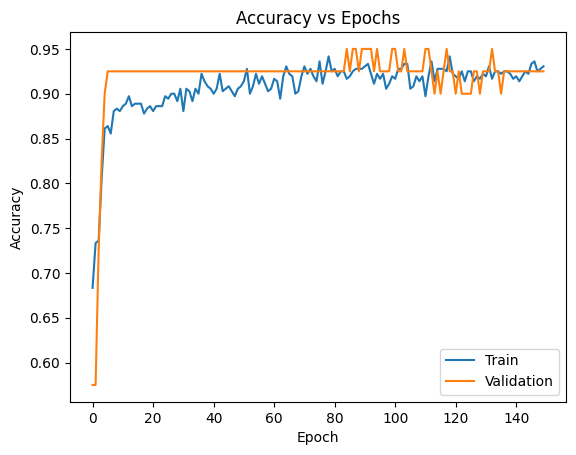

In [18]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [19]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [20]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [21]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(11,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [22]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_2 = model_2.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=2)

Epoch 1/100
12/12 - 0s - 40ms/step - accuracy: 0.6861 - loss: 0.5479 - val_accuracy: 0.8250 - val_loss: 0.4867
Epoch 2/100
12/12 - 0s - 3ms/step - accuracy: 0.8500 - loss: 0.3887 - val_accuracy: 0.9000 - val_loss: 0.3126
Epoch 3/100
12/12 - 0s - 3ms/step - accuracy: 0.8694 - loss: 0.3276 - val_accuracy: 0.9250 - val_loss: 0.2960
Epoch 4/100
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.3125 - val_accuracy: 0.9000 - val_loss: 0.2783
Epoch 5/100
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.2997 - val_accuracy: 0.9250 - val_loss: 0.2795
Epoch 6/100
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.2901 - val_accuracy: 0.9250 - val_loss: 0.2637
Epoch 7/100
12/12 - 0s - 3ms/step - accuracy: 0.8806 - loss: 0.2727 - val_accuracy: 0.9250 - val_loss: 0.2574
Epoch 8/100
12/12 - 0s - 3ms/step - accuracy: 0.8806 - loss: 0.2542 - val_accuracy: 0.9250 - val_loss: 0.2515
Epoch 9/100
12/12 - 0s - 3ms/step - accuracy: 0.8972 - loss: 0.2455 - val_accuracy: 0.9250 - val_loss: 0.2440
Epoch 10/

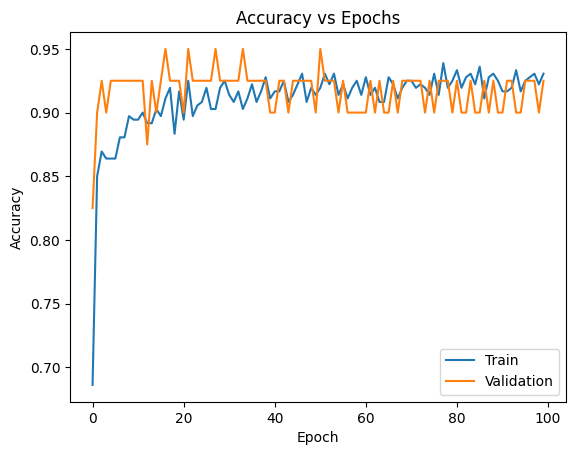

In [24]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [25]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [26]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [27]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(11,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [28]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_3 = model_3.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=200,
                    verbose=2)

Epoch 1/200
12/12 - 1s - 47ms/step - accuracy: 0.7667 - loss: 0.5353 - val_accuracy: 0.9000 - val_loss: 0.3788
Epoch 2/200
12/12 - 0s - 3ms/step - accuracy: 0.8528 - loss: 0.3651 - val_accuracy: 0.9000 - val_loss: 0.3009
Epoch 3/200
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.3233 - val_accuracy: 0.9000 - val_loss: 0.3055
Epoch 4/200
12/12 - 0s - 3ms/step - accuracy: 0.8611 - loss: 0.3051 - val_accuracy: 0.9000 - val_loss: 0.2876
Epoch 5/200
12/12 - 0s - 3ms/step - accuracy: 0.8639 - loss: 0.2952 - val_accuracy: 0.9000 - val_loss: 0.2748
Epoch 6/200
12/12 - 0s - 4ms/step - accuracy: 0.8806 - loss: 0.2873 - val_accuracy: 0.9250 - val_loss: 0.2618
Epoch 7/200
12/12 - 0s - 4ms/step - accuracy: 0.8861 - loss: 0.2659 - val_accuracy: 0.9250 - val_loss: 0.2472
Epoch 8/200
12/12 - 0s - 3ms/step - accuracy: 0.8861 - loss: 0.2525 - val_accuracy: 0.9250 - val_loss: 0.2373
Epoch 9/200
12/12 - 0s - 3ms/step - accuracy: 0.9000 - loss: 0.2526 - val_accuracy: 0.9000 - val_loss: 0.2301
Epoch 10/

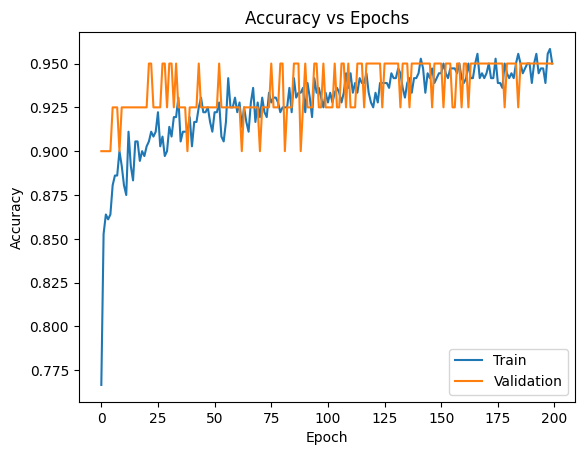

In [30]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [31]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0980 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.90      1.00      0.95        27

    accuracy                           0.97       100
   macro avg       0.95      0.98      0.96       100
weighted avg       0.97      0.97      0.97       100



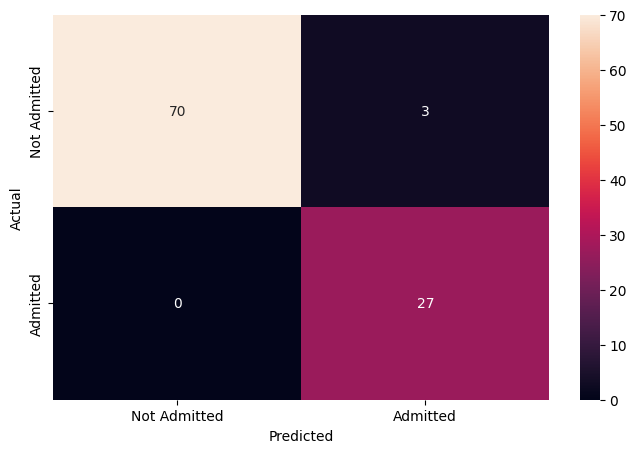

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()